In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv')
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


# Pandas Question

1. What is the minimum, median, max, and average salary for employee by Married Description and Gender.
Hints: use agg function<br>
Expected Output as below<br>
(10 Points)

In [ ]:
# 1. What is the minimum, median, max, and average salary for employee by Married Description and Gender
# Hints: use agg function
# Expected Output as below
# (10 Points)

salary_desc = data.groupby(['MaritalDesc', 'Sex'])['Salary'].agg(minimum_salary ='min', median_salary='median', max_salary='max', average_salary='mean')
salary_desc

minimum_salary  median_salary  max_salary  average_salary
MaritalDesc Sex                                                           
Divorced    F             45069        59393.0       68182    57345.500000
            M             45115        63738.5      148999    72520.857143
Married     F             45433        62662.0      250000    69638.986111
            M             46120        63370.5      157000    70089.038462
Separated   F             52984        60627.0       66149    60658.888889
            M             64397        70468.0       74417    69760.666667
Single      F             45395        62068.0      220450    68988.266667
            M             46428        63055.5      178000    71340.048387
Widowed     F             45046        63303.5      107226    69719.750000
            M             52788        61359.0       67176    60670.500000

2. What is top-5 reason of termination?<br>
Expected Output as below<br>
(10 Points)

In [ ]:
#code here
termreason_top5 = data['TermReason'].value_counts().head(5)
df_termreason_top5 = pd.DataFrame({'TermReason': termreason_top5.index, 'total_termintation': termreason_top5.values}).set_index('TermReason')
df_termreason_top5

,total_termintation
TermReason,
N/A-StillEmployed,207
Another position,20
unhappy,14
more money,11
career change,9


3. What is the highest number of employee by Recruitment Source that 'Exceeds' the Performance Score?
Hints: Use filter for Performance Score first. Don't forget to sort_values.<br>
Expected Output as below<br>
(10 Points)

In [ ]:
#code here
df_performance_exceed = data[data['PerformanceScore'] == 'Exceeds']
#df_performance_exceed.head(5)
recsource = df_performance_exceed['RecruitmentSource'].value_counts().sort_values(ascending=False)
df_recsource = pd.DataFrame({'RecruitmentSource': recsource.index, 'total_recruit': recsource.values}).set_index('RecruitmentSource')
df_recsource

,total_recruit
RecruitmentSource,
Indeed,12
LinkedIn,9
Diversity Job Fair,6
Employee Referral,5
CareerBuilder,2
Google Search,2
Website,1


4. How many managers in each department?
Hints: use nunique() as aggregation function.<br>
Expected Output as below.<br>
(10 Points)

In [ ]:
#code here
df_manager = data.groupby(by=['Department'])['ManagerName'].nunique()
df_manager

,ManagerName
Department,
Admin Offices,3
Executive Office,1
IT/IS,6
Production,10
Sales,4
Software Engineering,3


5. What is Termination Ratio by Gender?.
Hints: use value_counts(normalize=True).<br>
Expected Output as below.<br>
(10 Points)

In [ ]:
#code here
df_termgender = data.groupby('Sex')['Termd'].value_counts(normalize=True)
df_termgender.name = 'Termd'
print(df_termgender)

Sex  Termd
F    0        0.659091
     1        0.340909
M    0        0.674074
     1        0.325926
Name: Termd, dtype: float64


# Create an EDA and Data Visualization Question

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


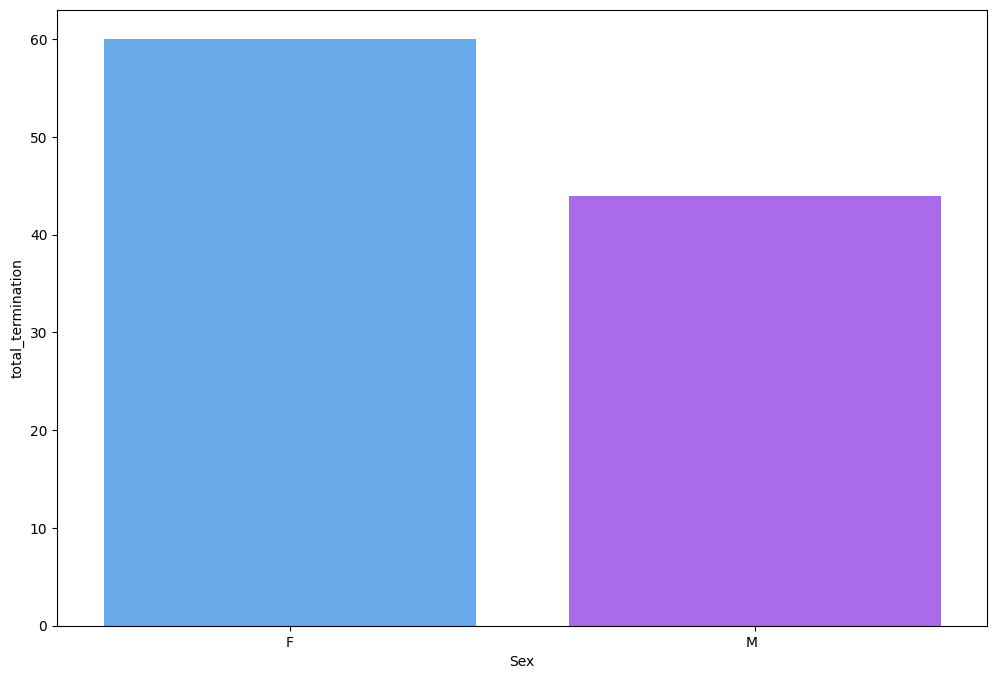

In [ ]:
#Sample Visualization, the example is not counted for the final score :p
#Create 5 visualization for better understanding on data
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

#Ratio termination by Gender

#Step1, get the data

term = data.groupby(by=['Sex'])\
                        .agg(total_termination=('Termd','sum')).reset_index()\

#Step2, Plot it
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='Sex', y='total_termination', hue='Sex', data=term, palette='cool')

6. Buatlah Scatter plot antara kolom "Salary" dengan "EngagementSurvey", beri warna berbeda sesuai dengan status di "Termd"<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

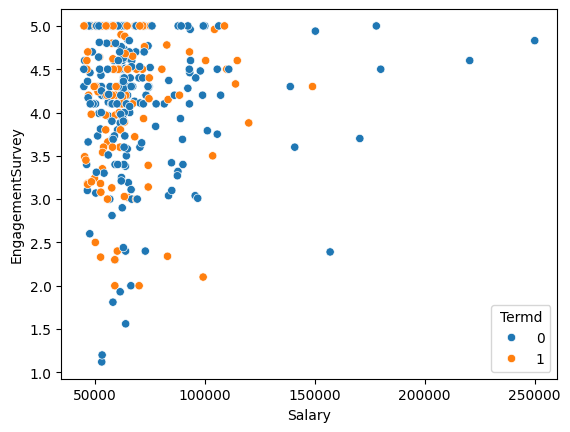

In [ ]:
sns.scatterplot(data=data, x='Salary', y='EngagementSurvey', hue='Termd')
plt.show()

7. Buatlah visualisasi barchart untuk menghitung jumlah "termination of an employee's" berdasarkan department.<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

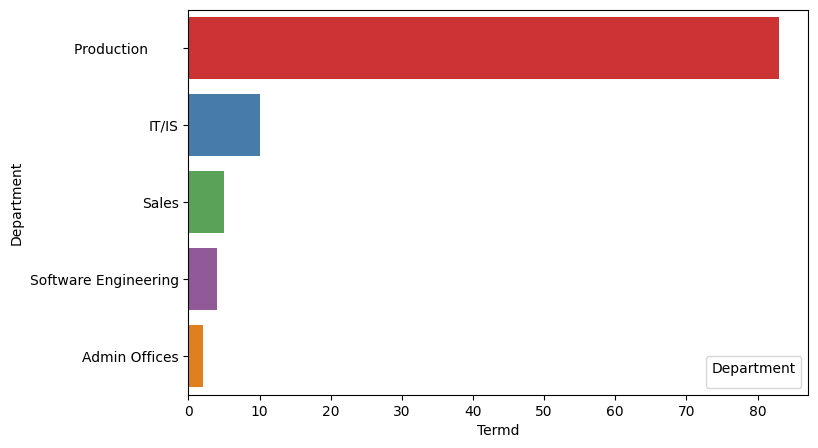

In [ ]:
termd1= data[data['Termd'] == 1]
termd_department = termd1['Department'].value_counts()
sns.set_palette("Set1")

#barplot
plt.figure(figsize=(8,5))
sns.barplot(x=termd_department.values,
            y=termd_department.index,
            hue=termd_department.index,
            dodge=False)
plt.xlabel('Termd')
plt.ylabel('Department')
plt.legend(title='Department')

8. Buatlah visualisasi Pie Chart untuk melihat persentasi jumlah karyawan yang "terminated" berdasarkan kolom "Position".<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

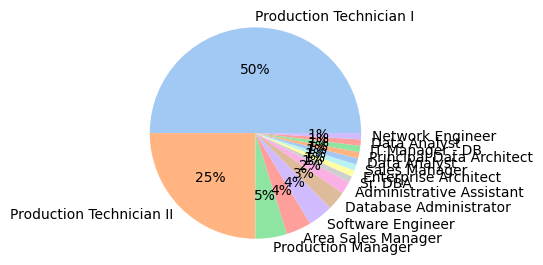

In [ ]:
termd1= data[data['Termd'] == 1]
termd_position = termd1['Position'].value_counts(normalize=True) * 100

#pie chart
plt.figure(figsize=(3, 3))
plt.pie(termd_position, labels=termd_position.index, autopct='%1.0f%%', startangle=0, colors=sns.color_palette('pastel', len(termd_position)))
plt.axis('equal')
plt.show()

9. Buat Boxplot yang menggambarkan Salary berdasarkan Marital Desc, bedakan berdasarkan Termd
(5 points)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

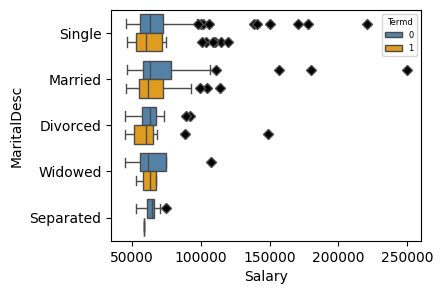

In [ ]:
palette = {0: 'steelblue', 1: 'orange'}
plt.figure(figsize=(4,3))
sns.boxplot(data=data, x='Salary', y='MaritalDesc', hue='Termd', palette=palette, flierprops=dict(marker='D', markerfacecolor='black', markersize=5, linestyle='none'))
plt.legend(loc='upper right', title="Termd", prop={'size': 6}, title_fontsize='6')
plt.show()

10. Tampilkan pairplot antara kolom 'Salary', 'EngagementSurvey', 'EmpSatisfaction','Absences'
beri kategori warna berdasarkan 'Termd'<br>
(10 points)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

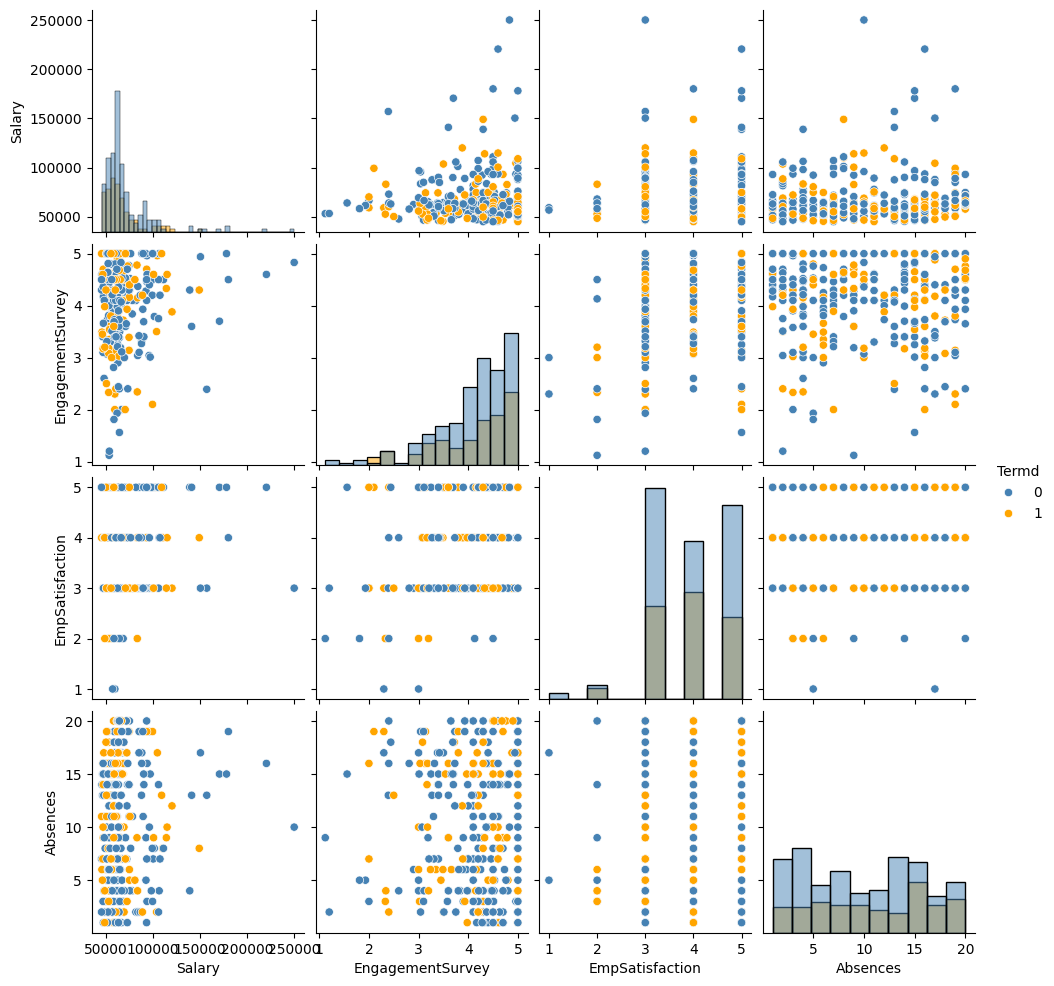

In [ ]:
#palette = {0: 'blue', 1: 'orange'}
sns.pairplot(data=data, hue='Termd', vars=['Salary', 'EngagementSurvey', 'EmpSatisfaction','Absences'], palette=palette, diag_kind='hist')
plt.show()

# Insight (Answering the Question)

11.	Is there any relationship between who a person works for (their manager) and their performance score? (10 points)<br>
12.	What are our best recruiting sources if we want to ensure a low ratio of termination? (10 points)<br>

### **No 11**

Chi-square value: 67.00285400941642, p-value: 0.24942407783130077


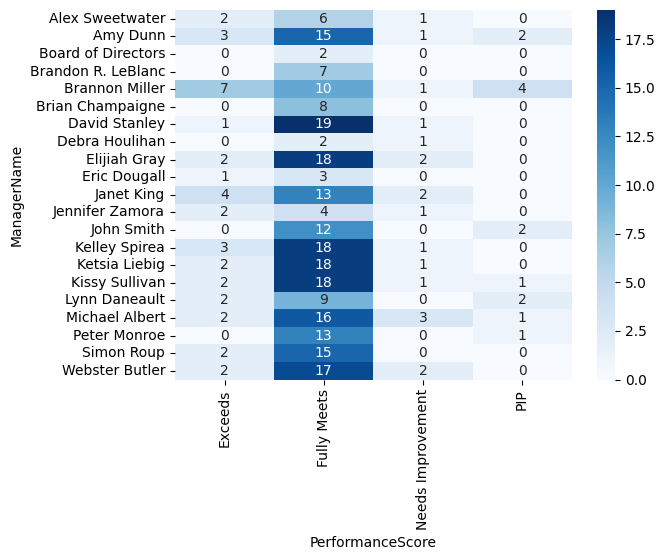

In [ ]:
# NOMOR 11
from scipy.stats import chi2_contingency
crosstab = pd.crosstab(data['ManagerName'], data['PerformanceScore'])
chi2, p, dof, expected = chi2_contingency(crosstab)
print(f"Chi-square value: {chi2}, p-value: {p}")

sns.heatmap(crosstab, annot=True, cmap='Blues')
plt.show()

Pada output di atas dapat dilihat bahwa nilai p-value = 0,249 > alpha = 0,05.
Maka dapat disimpulkan bahwa karyawan-karyawan yang bekerja di Manager manapun (baik karyawan yang sudah resign maupun yang belum resign) **tidak memiliki hubungan** dengan Performance Score nya.

Dapat dilihat juga dari grafik heatmapnya (berdasarkan tabel kontingensi), dimana karyawan yang bekerja dibawah manager manapun kebanyakan memiliki performance score yang memenuhi standard (fully meets). Maka dari itu dapat disimpulkan bahwa karyawan-karyawan yang bekerja di Manager manapun  **tidak memiliki hubungan** dengan Performance Score nya.

### **No 12**

In [ ]:
total_per_source = data.groupby('RecruitmentSource')['Termd'].count()
total_per_termd1 = data[data['Termd'] == 1].groupby('RecruitmentSource')['Termd'].count()

# Menghitung persentase
percent = (total_per_termd1 / total_per_source * 100)

df = pd.DataFrame({
    'RecruitmentSource': percent.index,
    'Percent': percent.values
})

df_sorted = df.sort_values(by='Percent', ascending=True).reset_index(drop=True)

print(df_sorted)

         RecruitmentSource     Percent
0                  Website    7.692308
1        Employee Referral   16.129032
2                 LinkedIn   23.684211
3                   Indeed   24.137931
4            CareerBuilder   47.826087
5                    Other   50.000000
6       Diversity Job Fair   55.172414
7            Google Search   61.224490
8  On-line Web application  100.000000


Output di atas menunjukkan proporsi karyawan terminate berdasarkan RecruitmentSource-nya. Semakin besar persentasenya maka semakin banyak karyawan yang terminate. Dapat dilihat bahwa persentase terkecil didapat ketika karyawan tersebut melamar melalui Website, yaitu sebesar 7,7%. Sehingga dapat disimpulkan recruitmentsource yang memiliki rasio terminate terendah didapat ketika karyawan tersebut melamar melalui **Website**.

Namun perlu diingat bahwa dalam menekan angka terminate karyawan tidak hanya dilihat dari recruitmentsourcenya saja, namun bisa jadi terdapat faktor lain yang mempengaruhi angka terminate karyawan.